<a href="https://colab.research.google.com/github/LamaElkhouk/pythonh3hitema/blob/main/Copie_de_introduction_analyse_donn%C3%A9es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab est une machine distante
!ls

!pwd

!pip list | grep seaborn  #pour s'assurer que la librairie existe deja

# on utilise ! avant chaque commande pour utiliser du bash, la commande interprete du bash


sample_data
/content
seaborn                       0.11.2


**Introduction**


In [3]:
#charger les librairies

import pandas as pd
import numpy as np
import seaborn as sb


#revisions
tab = []

for i in range(10):
  tab.append(i)
tab


tab2=[x for x in range(10)] 
tab2

tab3=[[ x for x in range(10)] for y in range(10)]  #tableau en deux dimension
tab3

#inconvenient
#recuperer une colonne on itere sur les lignes et numpy resou ce probleme et fonctionne avec des array()
tab4=[[1,2,3],[3,4,6]]
ar = np.array(tab4)
ar=np.array(tab4,dtype='int8')
ar.max()
ar.dtype

ar.std() #ecart-type

ar.mean() #moyenne
ar.shape  # deux ligne , trois colonnes 

#création rapide de tableau
b= np.linspace(0,2,4); b  #va de 0 à 2 et met 4 points

b**2  #mettre au carré les valeurs

c= np.arange(24).reshape(2,3,4)#tableau de 24 valeurs
#2 sous tab de 3 dimension,  4 colonnes , numpy ordonne les valeurs 

c.shape
c.ndim
#favoriser l'utilisation de shape


#création d'un masque
ar==3


#axis=1  ligne   axis=0  colonne

test=np.array([[1,2],[3,4]])

test.sum(axis=0)

#tres important , matrice diagonale
np.diag(np.array([1,4,7,9]))


array([[1, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 7, 0],
       [0, 0, 0, 9]])

**manipulation de pandas**



In [ ]:
#numpy utilise les array et pandas utilise les series
#les series sont indexé et print le format de données


l=pd.Series(['il','fait','beau'])
l


0      il
1    fait
2    beau
dtype: object

**Data Visualisation Statistiques descriptives **


**1) Importez les données csv**



In [ ]:


house_pricing = pd.read_csv('/house_pricing.csv');
house_pricing.head(10) #affiche les 3 prmieres ligne du tableau csv

house_pricing.dropna(how='any', subset=['Alley'])


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500


**les types de variables**

les variables quantitatives =>

      => continue (float) : LotFrontage , ...
      => discrete (int) : MSSubClass , LotArea, PoolArea, Miscval,Mosold, ...
les variables qualitatives =>

      =>nominale :MSZoning, Street,LotShap, LandContour,Utilities
      =>ordinale
      =>binaire ( exemple : homme / femme , oui / non, ..)

**3) créer un nuage de points**


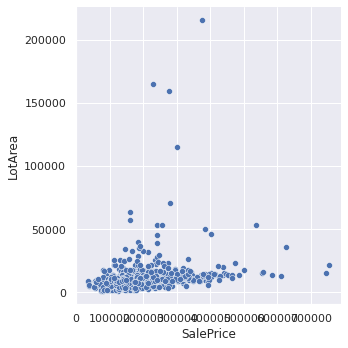

In [ ]:

sb.relplot(
    x=house_pricing.SalePrice, y=house_pricing.LotArea
)

SalePrice est une variable discrete


**4) Affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotArea inférieur à 20 000 pieds carrés et un prix inférieur à 500 000$ **


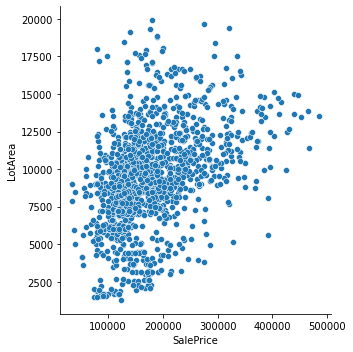

In [ ]:

A=house_pricing[(house_pricing.LotArea < 20000) & (house_pricing.SalePrice < 500000)]
house_pricing.loc[:,['LotArea','SalePrice']]
sb.relplot(
    x=A.SalePrice, y=A.LotArea
)



**5) En créant un nuage de points, regardez la relation entre le LotFrontage et le LotArea**



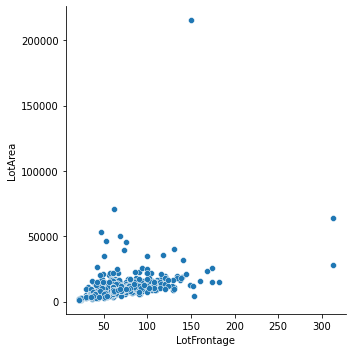

In [ ]:
sb.relplot(
    x=house_pricing.LotFrontage, y=house_pricing.LotArea
)

**6) De la même manière, affinez votre visualisation en ne gardant uniquement les maisons qui ont un LotFrontage inférieur à 200 pieds carrés et un LotArea inférieur à 100000 pieds carré**



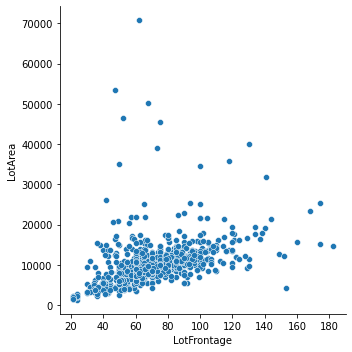

In [ ]:
B=house_pricing[(house_pricing.LotArea <  100000 ) & (house_pricing.LotFrontage < 200)]

house_pricing.loc[:,['LotArea','LotFrontage']]

sb.relplot(
    x=B.LotFrontage, y=B.LotArea
)


** 2 : Visualisation de variables catégoriques**


In [20]:
sales_predictions = pd.read_csv('/sales_predictions.csv');
sales_predictions.head(10) #affiche les 3 prmieres ligne du tableau csv


#spécifier le type de données
sales_predictions.dtypes




date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

**2) En utilisant relplot(), construisez un graphique qui va vous permettre de voir l’évolution 
des prix par rapport au temps. Que pouvez vous voir ?** 

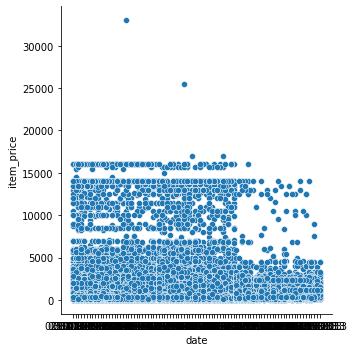

In [6]:
sb.relplot(
    x=sales_predictions.date, y=sales_predictions.item_price
)

** 3) Corrigeons le problème de visualisation, en utilisant la fonction .sample() de Pandas, 
prenez un échantillons de 50 éléments dans votre dataset **




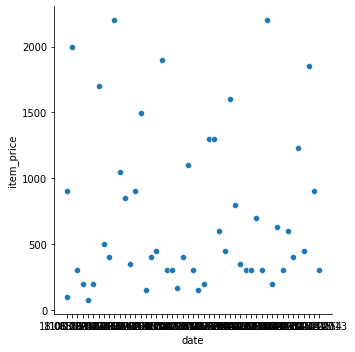

In [14]:
S=sales_predictions.sample(n=50)

sb.relplot(
    x=S.date, y=S.item_price
)

** 5) En utilisant la fonction pd.to_datetime(), convertissez votre colonne date en datetime **



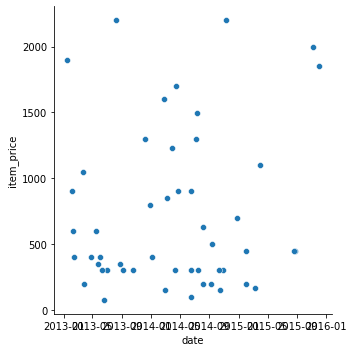

In [45]:
#sales_predictions['date']= pd.to_datetime(sales_predictions['date'],format='%m.%d.%Y')

new_date=pd.to_datetime(sales_predictions.date)


sb.relplot(
    x=new_date, y=S.item_price
)

** exo 3: Visualisation de variables catégoriques **

